# Overview data

In [1]:
import pandas as pd 

#Import data

df  = pd.read_excel('fraud_data.xlsx',sheet_name='fraud_data')
df

,Month,WeekOfMonth,DayOfWeek,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Year,PolicyNumber,RepNumber,PolicyType,...,AccidentArea,PoliceReportFiled,WitnessPresent,AddressChange_Claim,AgeOfPolicyHolder,Sex,MaritalStatus,DriverRating,Age,FraudFound_P
0,Dec,5,Wednesday,Tuesday,Jan,1,1994,1,12,Sport - Liability,...,Urban,No,No,1 year,26 to 30,Female,Single,1,21,0
1,Jan,3,Wednesday,Monday,Jan,4,1994,2,15,Sport - Collision,...,Urban,Yes,No,no change,31 to 35,Male,Single,4,34,0
2,Oct,5,Friday,Thursday,Nov,2,1994,3,7,Sport - Collision,...,Urban,No,No,no change,41 to 50,Male,Married,3,47,0
3,Jun,2,Saturday,Friday,Jul,1,1994,4,4,Sedan - Liability,...,Rural,Yes,No,no change,51 to 65,Male,Married,2,65,0
4,Jan,5,Monday,Tuesday,Feb,2,1994,5,3,Sport - Collision,...,Urban,No,No,no change,31 to 35,Female,Single,1,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14415,Nov,4,Friday,Monday,Nov,4,1996,15415,3,Sedan - Collision,...,Urban,No,No,4 to 8 years,51 to 65,Male,Single,4,58,0
14416,Nov,5,Thursday,Friday,Dec,1,1996,15417,11,Sedan - Liability,...,Urban,No,No,no change,31 to 35,Male,Married,3,30,0
14417,Nov,5,Thursday,Friday,Dec,1,1996,15418,4,Sedan - Collision,...,Rural,No,No,no change,26 to 30,Male,Single,4,24,1
14418,Dec,1,Monday,Thursday,Dec,2,1996,15419,6,Sedan - All Perils,...,Urban,No,No,no change,31 to 35,Female,Married,4,34,0


In [2]:
# Check each column has null value or not?

df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Year                    0
PolicyNumber            0
RepNumber               0
PolicyType              0
VehicleCategory         0
BasePolicy              0
Make                    0
VehiclePrice            0
AgeOfVehicle            0
Deductible              0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
NumberOfSuppliments     0
NumberOfCars            0
AgentType               0
Fault                   0
AccidentArea            0
PoliceReportFiled       0
WitnessPresent          0
AddressChange_Claim     0
AgeOfPolicyHolder       0
Sex                     0
MaritalStatus           0
DriverRating            0
Age                     0
FraudFound_P            0
dtype: int64

In [3]:
# Check type of data in each column

df.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Year                     int64
PolicyNumber             int64
RepNumber                int64
PolicyType              object
VehicleCategory         object
BasePolicy              object
Make                    object
VehiclePrice            object
AgeOfVehicle            object
Deductible               int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
NumberOfSuppliments     object
NumberOfCars            object
AgentType               object
Fault                   object
AccidentArea            object
PoliceReportFiled       object
WitnessPresent          object
AddressChange_Claim     object
AgeOfPolicyHolder       object
Sex                     object
MaritalStatus           object
DriverRating             int64
Age                      int64
FraudFou

In [4]:
# Check duplicated value in column 'No'

len(df['PolicyNumber'].unique())

14420

As you can see , value in 'PolicyNumber' column is the same as row in df , 

So it's means 'PolicyNumber' hasn't duplicated value (each row is collected from different Policyholder)

In [5]:
# show df column name 

df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',
       'WeekOfMonthClaimed', 'Year', 'PolicyNumber', 'RepNumber', 'PolicyType',
       'VehicleCategory', 'BasePolicy', 'Make', 'VehiclePrice', 'AgeOfVehicle',
       'Deductible', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'NumberOfSuppliments', 'NumberOfCars',
       'AgentType', 'Fault', 'AccidentArea', 'PoliceReportFiled',
       'WitnessPresent', 'AddressChange_Claim', 'AgeOfPolicyHolder', 'Sex',
       'MaritalStatus', 'DriverRating', 'Age', 'FraudFound_P'],
      dtype='object')

The next step , I check inconsistent value

In [6]:
df_pivot = df.pivot_table(index='PolicyType', columns='VehicleCategory', values='FraudFound_P', aggfunc='count', fill_value=0)
df_pivot

VehicleCategory,Sedan,Sport,Utility
PolicyType,,,
Sedan - All Perils,3820,0,0
Sedan - Collision,5198,0,0
Sedan - Liability,0,4694,0
Sport - All Perils,0,22,0
Sport - Collision,0,323,0
Sport - Liability,0,1,0
Utility - All Perils,0,0,317
Utility - Collision,0,0,27
Utility - Liability,0,0,18


As you can see , 

Value in PolicyType = Sedan - Liability and VehicleCategory = Sport is 4694 but 

Value in PolicyType = Sedan - Liability and VehicleCategory = Sedan is 0

It's not make sense , It should be below :

Value in PolicyType = Sedan - Liability and VehicleCategory = Sport is 0 and

Value in PolicyType = Sedan - Liability and VehicleCategory = Sedan is 4694

In [7]:
# solve inconsistent value 

df.loc[df['PolicyType'] == 'Sedan - Liability', 'VehicleCategory'] = 'Sedan'

# Check again 

df.pivot_table(index='PolicyType', columns='VehicleCategory', values='FraudFound_P', aggfunc='count', fill_value=0)

VehicleCategory,Sedan,Sport,Utility
PolicyType,,,
Sedan - All Perils,3820,0,0
Sedan - Collision,5198,0,0
Sedan - Liability,4694,0,0
Sport - All Perils,0,22,0
Sport - Collision,0,323,0
Sport - Liability,0,1,0
Utility - All Perils,0,0,317
Utility - Collision,0,0,27
Utility - Liability,0,0,18


In [8]:
df_pivot = df.pivot_table(index='Age', columns='AgeOfPolicyHolder', values='FraudFound_P', aggfunc='count', fill_value=0)
df_pivot

AgeOfPolicyHolder,16 to 17,18 to 20,21 to 25,26 to 30,31 to 35,36 to 40,41 to 50,51 to 65,over 65
Age,,,,,,,,,
0,298,0,0,0,0,0,0,0,0
16,0,7,0,0,0,0,0,0,0
17,0,5,0,0,0,0,0,0,0
18,0,0,42,0,0,0,0,0,0
19,0,0,31,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
76,0,0,0,0,0,0,0,0,41
77,0,0,0,0,0,0,0,0,27
78,0,0,0,0,0,0,0,0,35


As you can see , row Age = 0 has value only in column 'AgeOfPolicyHolder' = 16 to 17

and the others , I notice value in column 'AgeOfPolicyHolder' greater than 'Age'

I guess row Age = 0 which means people who are less than 16 years old and don't have a driver's license

Finallly , I decide to keep its value and note warning about this one 

In [9]:
# Check suspected columns which have relation or not?

df.pivot_table(index='PolicyType', columns='BasePolicy', values='FraudFound_P', aggfunc='count', fill_value=0)

BasePolicy,All Perils,Collision,Liability
PolicyType,,,
Sedan - All Perils,3820,0,0
Sedan - Collision,0,5198,0
Sedan - Liability,0,0,4694
Sport - All Perils,22,0,0
Sport - Collision,0,323,0
Sport - Liability,0,0,1
Utility - All Perils,317,0,0
Utility - Collision,0,27,0
Utility - Liability,0,0,18


As you can see , 'BasePolicy' and 'PolicyType' has relation each other

So the next step , I decide to remove columns which I don't use

In [10]:
column_drop = ['Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',
                 'WeekOfMonthClaimed', 'Year', 'PolicyNumber', 'RepNumber', 'PolicyType']

df = df.drop(column_drop,axis=1)
df

,VehicleCategory,BasePolicy,Make,VehiclePrice,AgeOfVehicle,Deductible,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,NumberOfSuppliments,...,AccidentArea,PoliceReportFiled,WitnessPresent,AddressChange_Claim,AgeOfPolicyHolder,Sex,MaritalStatus,DriverRating,Age,FraudFound_P
0,Sport,Liability,Honda,more than 69000,3 years,300,more than 30,more than 30,none,none,...,Urban,No,No,1 year,26 to 30,Female,Single,1,21,0
1,Sport,Collision,Honda,more than 69000,6 years,400,more than 30,more than 30,none,none,...,Urban,Yes,No,no change,31 to 35,Male,Single,4,34,0
2,Sport,Collision,Honda,more than 69000,7 years,400,more than 30,more than 30,1,none,...,Urban,No,No,no change,41 to 50,Male,Married,3,47,0
3,Sedan,Liability,Toyota,20000 to 29000,more than 7,400,more than 30,more than 30,1,more than 5,...,Rural,Yes,No,no change,51 to 65,Male,Married,2,65,0
4,Sport,Collision,Honda,more than 69000,5 years,400,more than 30,more than 30,none,none,...,Urban,No,No,no change,31 to 35,Female,Single,1,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14415,Sedan,Collision,Chevrolet,30000 to 39000,7 years,400,more than 30,more than 30,none,1 to 2,...,Urban,No,No,4 to 8 years,51 to 65,Male,Single,4,58,0
14416,Sedan,Liability,Pontiac,30000 to 39000,6 years,400,more than 30,more than 30,more than 4,more than 5,...,Urban,No,No,no change,31 to 35,Male,Married,3,30,0
14417,Sedan,Collision,Toyota,20000 to 29000,5 years,400,more than 30,more than 30,more than 4,1 to 2,...,Rural,No,No,no change,26 to 30,Male,Single,4,24,1
14418,Sedan,All Perils,Toyota,20000 to 29000,2 years,400,more than 30,more than 30,none,more than 5,...,Urban,No,No,no change,31 to 35,Female,Married,4,34,0


# Create appropriate model

In [11]:
df

,VehicleCategory,BasePolicy,Make,VehiclePrice,AgeOfVehicle,Deductible,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,NumberOfSuppliments,...,AccidentArea,PoliceReportFiled,WitnessPresent,AddressChange_Claim,AgeOfPolicyHolder,Sex,MaritalStatus,DriverRating,Age,FraudFound_P
0,Sport,Liability,Honda,more than 69000,3 years,300,more than 30,more than 30,none,none,...,Urban,No,No,1 year,26 to 30,Female,Single,1,21,0
1,Sport,Collision,Honda,more than 69000,6 years,400,more than 30,more than 30,none,none,...,Urban,Yes,No,no change,31 to 35,Male,Single,4,34,0
2,Sport,Collision,Honda,more than 69000,7 years,400,more than 30,more than 30,1,none,...,Urban,No,No,no change,41 to 50,Male,Married,3,47,0
3,Sedan,Liability,Toyota,20000 to 29000,more than 7,400,more than 30,more than 30,1,more than 5,...,Rural,Yes,No,no change,51 to 65,Male,Married,2,65,0
4,Sport,Collision,Honda,more than 69000,5 years,400,more than 30,more than 30,none,none,...,Urban,No,No,no change,31 to 35,Female,Single,1,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14415,Sedan,Collision,Chevrolet,30000 to 39000,7 years,400,more than 30,more than 30,none,1 to 2,...,Urban,No,No,4 to 8 years,51 to 65,Male,Single,4,58,0
14416,Sedan,Liability,Pontiac,30000 to 39000,6 years,400,more than 30,more than 30,more than 4,more than 5,...,Urban,No,No,no change,31 to 35,Male,Married,3,30,0
14417,Sedan,Collision,Toyota,20000 to 29000,5 years,400,more than 30,more than 30,more than 4,1 to 2,...,Rural,No,No,no change,26 to 30,Male,Single,4,24,1
14418,Sedan,All Perils,Toyota,20000 to 29000,2 years,400,more than 30,more than 30,none,more than 5,...,Urban,No,No,no change,31 to 35,Female,Married,4,34,0


In [12]:
df.columns

Index(['VehicleCategory', 'BasePolicy', 'Make', 'VehiclePrice', 'AgeOfVehicle',
       'Deductible', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'NumberOfSuppliments', 'NumberOfCars',
       'AgentType', 'Fault', 'AccidentArea', 'PoliceReportFiled',
       'WitnessPresent', 'AddressChange_Claim', 'AgeOfPolicyHolder', 'Sex',
       'MaritalStatus', 'DriverRating', 'Age', 'FraudFound_P'],
      dtype='object')

In [13]:
X = df.drop(['FraudFound_P'],axis=1)
y = df[['FraudFound_P']]

print('X.columns : {}'.format(X.columns))
print(X.dtypes)
print('-'*40)
print('y.columns : {}'.format(y.columns))
print(y.dtypes)

X.columns : Index(['VehicleCategory', 'BasePolicy', 'Make', 'VehiclePrice', 'AgeOfVehicle',
       'Deductible', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'NumberOfSuppliments', 'NumberOfCars',
       'AgentType', 'Fault', 'AccidentArea', 'PoliceReportFiled',
       'WitnessPresent', 'AddressChange_Claim', 'AgeOfPolicyHolder', 'Sex',
       'MaritalStatus', 'DriverRating', 'Age'],
      dtype='object')
VehicleCategory         object
BasePolicy              object
Make                    object
VehiclePrice            object
AgeOfVehicle            object
Deductible               int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
NumberOfSuppliments     object
NumberOfCars            object
AgentType               object
Fault                   object
AccidentArea            object
PoliceReportFiled       object
WitnessPresent          object
AddressChange_Claim     object
AgeOfPolicyHolder       object
Sex 

Before training model , you must convert categorical features to numeric by using some technique 

I choose get dummy technique to perform one-hot encoding

In [14]:
X = pd.get_dummies(X)
X

,Deductible,DriverRating,Age,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,Make_Accura,...,AgeOfPolicyHolder_36 to 40,AgeOfPolicyHolder_41 to 50,AgeOfPolicyHolder_51 to 65,AgeOfPolicyHolder_over 65,Sex_Female,Sex_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow
0,300,1,21,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,400,4,34,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,400,3,47,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
3,400,2,65,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
4,400,1,27,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14415,400,4,58,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
14416,400,3,30,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
14417,400,4,24,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
14418,400,4,34,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [15]:
a=len(y[y['FraudFound_P']==0])
b=len(y[y['FraudFound_P']==1])

print('Amount of Normal : {}'.format(a))
print('Amount of Fraud  : {}'.format(b))

print('Fraud : Normal = {:.2f} %'.format((b*100/a)))

Amount of Normal : 13597
Amount of Fraud  : 823
Fraud : Normal = 6.05 %


As you can see , My target variable trends to imbalance 

So I decide to use 2 techniques for handle this one :

1.SMOTE

2.class_weight

And there is a important thing , I choose recall value for evaluating model because 

In real world business , if fauld occurs, it will damage the company greatly.

So I think appropriate model must has maximum recall among others 

Although there are some cases that the prediction is wrong but it's a careful prediction. 

Even though the claimant may not be a fraud, it's still better than being imprudent and allow more opportunities for fraud

In [ ]:
import numpy as np 

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

smote = SMOTE(random_state=0)

X_scaled = scaler.fit_transform(X)

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X_scaled, y.values.ravel())

# Candidated algorithm models
models = []
models.append(('LR', LogisticRegression(class_weight='balanced', max_iter=10000)))
models.append(('kNN', KNeighborsClassifier()))
models.append(('SVC', SVC(class_weight='balanced')))
models.append(('RFC', RandomForestClassifier(class_weight='balanced', random_state=0)))
models.append(('DT', DecisionTreeClassifier(class_weight='balanced', random_state=0)))
models.append(('MLP', MLPClassifier( hidden_layer_sizes=32, max_iter=1000, random_state=0)))
models.append(('GNB', GaussianNB()))
models.append(('XGB', XGBClassifier(scale_pos_weight=sum(y_resampled==0)/sum(y_resampled==1), random_state=0)))

names = []
results = []

for name, model in models:
    scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='recall')
    names.append(name)
    results.append(scores)
    print('{:4} -> Recall : {:.3f} % (Std : {:.3f} %)'.format(name, scores.mean()*100, scores.std()*100))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

# Print classification report for best model (Before Tuning)
best_model_index = np.argmax([np.mean(r) for r in results])
best_model = models[best_model_index][1]
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

LR   -> Recall : 91.836 % (Std : 0.415 %)
kNN  -> Recall : 99.750 % (Std : 0.049 %)
SVC  -> Recall : 93.873 % (Std : 5.329 %)
RFC  -> Recall : 96.057 % (Std : 7.775 %)
DT   -> Recall : 95.042 % (Std : 8.080 %)
MLP  -> Recall : 96.734 % (Std : 2.626 %)
GNB  -> Recall : 96.558 % (Std : 0.925 %)
XGB  -> Recall : 94.116 % (Std : 11.457 %)
              precision    recall  f1-score   support

           0       1.00      0.74      0.85      2704
           1       0.80      1.00      0.89      2735

    accuracy                           0.87      5439
   macro avg       0.90      0.87      0.87      5439
weighted avg       0.90      0.87      0.87      5439

[[2006  698]
 [   8 2727]]


As you can see , kNN is the best model because it has maximum Recall and minimum Std 

So I choose kNN model but I should check this model overfitting or not before running tuning process

c:\Users\Panupong Jindarat\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Panupong Jindarat\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


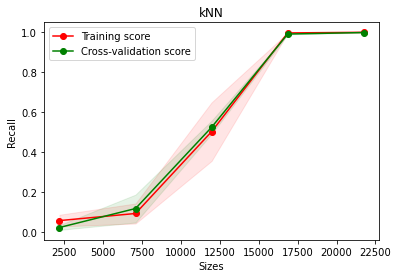

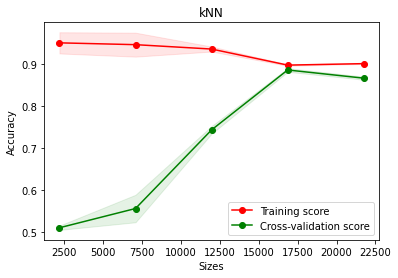

In [ ]:
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt

scoring = ['recall','accuracy']

y_label_name = ['Recall','Accuracy']

for i in range(2):
    train_sizes, train_scores, test_scores = learning_curve(best_model,X_resampled, y_resampled, cv=5, train_sizes=np.linspace(.1, 1.0, 5),scoring=scoring[i])

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.title('kNN')
    plt.ylabel(y_label_name[i])
    plt.xlabel('Sizes')
    plt.legend(loc="best")
    plt.show()

As you can see from graph above , there is no large gap between these two lines from kNN model 

So I summarize that my model isn't overfitting and I choose this model to tuning process

Tuning model

In [20]:
from sklearn.model_selection import GridSearchCV

# Define the range of hyperparameters to optimize
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'metric': ['euclidean', 'manhattan', 'minkowski'],
                # 'p' : [1,2,3],
                # 'leaf_size':[10,20,30,40,50]
                }

# Perform the grid search
grid_search = GridSearchCV(KNeighborsClassifier(), 
                            param_grid, 
                            scoring='recall', 
                            cv=5, 
                            verbose=1) 
grid_search.fit(X_resampled, y_resampled)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(grid_search.best_score_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best hyperparameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.9988233401120654


From above , I get the best model which has parameter like those 

Then , I check my tuning model is overfitting or not

c:\Users\Panupong Jindarat\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Panupong Jindarat\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


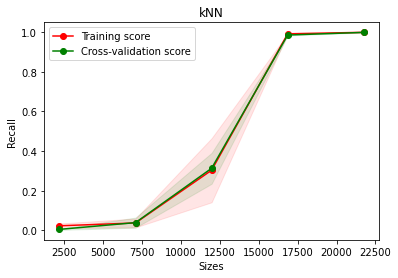

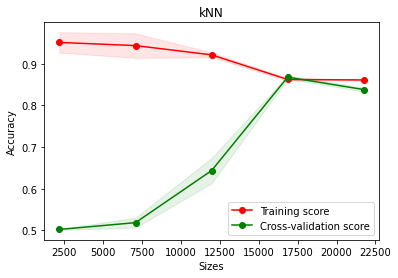

In [21]:
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt

scoring = ['recall','accuracy']

y_label_name = ['Recall','Accuracy']

knn =  KNeighborsClassifier(**grid_search.best_params_)

for i in range(2):
    train_sizes, train_scores, test_scores = learning_curve(knn,
                                                            X_resampled, y_resampled, cv=5, train_sizes=np.linspace(.1, 1.0, 5),scoring=scoring[i])

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.title('kNN')
    plt.ylabel(y_label_name[i])
    plt.xlabel('Sizes')
    plt.legend(loc="best")
    plt.show()

As you can see from graph above , there is no large gap between these two lines from kNN model 

So I choose it as the best model for fraud detection

In [22]:
# Save model

import joblib

filename = 'KNN.pkl'
joblib.dump(knn, filename) 
print(f"Trained KNN model saved to {filename}")

Trained KNN model saved to KNN.pkl


Load the best model to predict fraud and try to convert the threshold 

In [23]:
### Import and format data ###

# df  = pd.read_excel('fraud_data.xlsx',sheet_name='fraud_data')
# df.loc[df['PolicyType'] == 'Sedan - Liability', 'VehicleCategory'] = 'Sedan'

# column_drop = ['Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',
#                  'WeekOfMonthClaimed', 'Year', 'PolicyNumber', 'RepNumber', 'PolicyType']

# df = df.drop(column_drop,axis=1)

# X = df.drop(['FraudFound_P'],axis=1)
# y = df[['FraudFound_P']]

# scaler = MinMaxScaler()

# smote = SMOTE(random_state=0)

# X_scaled = scaler.fit_transform(X)

# X_resampled, y_resampled = smote.fit_resample(X_scaled, y.values.ravel())

# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

### Load model ###

filename = 'KNN.pkl'

model_knn = joblib.load(filename)

model_knn.fit(X_train, y_train)

y_pred_proba = model_knn.predict_proba(X_test)[:, 1]  # predicted probabilities of positive class

# define thresholds to test
thresholds = [x/100 for x in range(5, 100, 5)]

# loop through thresholds and print confusion matrix for each
for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)  # predicted class labels
    cm = confusion_matrix(y_test, y_pred)  # confusion matrix
    print(f"Threshold = {threshold}")
    print(cm)
    print(classification_report(y_test, y_pred))
    print('-'*40)

Threshold = 0.05
[[1191 1513]
 [   0 2735]]
              precision    recall  f1-score   support

           0       1.00      0.44      0.61      2704
           1       0.64      1.00      0.78      2735

    accuracy                           0.72      5439
   macro avg       0.82      0.72      0.70      5439
weighted avg       0.82      0.72      0.70      5439

----------------------------------------
Threshold = 0.1
[[1191 1513]
 [   0 2735]]
              precision    recall  f1-score   support

           0       1.00      0.44      0.61      2704
           1       0.64      1.00      0.78      2735

    accuracy                           0.72      5439
   macro avg       0.82      0.72      0.70      5439
weighted avg       0.82      0.72      0.70      5439

----------------------------------------
Threshold = 0.15
[[1350 1354]
 [   3 2732]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67      2704
           1       0.67 

# KNeighborsClassifier with parameters: 

# {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}

# At any threshold that you can convert as you want 

# is the best model for fraud detection